<img align="center" src="https://raw.githubusercontent.com/FUlyankin/Parsers/master/images%20/cats.jpg" height="1200" width="1200"> 


# Семинар 3:  Основы статистики 

На этом семинаре мы поговорим про основы статистики. __Наша цель на сегодня:__ 

* Поставить новый мировой рекорд по запуску анаконды
* Мынаучимся считать разные статистические характеристики ручками 
* Посмотрим как их считать в питоне 
* Продолжим работать с табличками в pandas 


Продолжим использовать датасет по нашему вк. 

In [1]:
import pandas as pd
%matplotlib inline 

In [2]:
df = pd.read_csv('../data/vk_download/vk_main.csv', sep='\t')
df.head()

,city,country,first_name,home_town,in_hse_memes_group,is_bmm,is_closed,last_name,likes_memes,uid,...,photo_month_mean,photo_repost_cnt,photo_repost_max,photo_repost_mean,photo_repost_median,photo_text_len_cnt,photo_ava_change_cnt,photo_text_url_len_cnt,friends_from_course_cnt,friends_mail_from_course_pct
0,Москва,Россия,Александра,Москва,True,True,False,Абашкова,60.0,182152789,...,1.333333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,42.0,0.428571
1,Рязань,Россия,Анастасия,Рязань,True,True,False,Чуфистова,0.0,148020433,...,2.375000,2.0,1.0,0.105263,0.0,0.0,0.0,0.0,32.0,0.281250
2,Москва,Россия,Александр,Омск,False,True,False,Головачев,0.0,138413935,...,1.400000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,32.0,0.406250
3,NaN,NaN,Анна,NaN,False,True,False,Лобанова,0.0,366261055,...,4.166667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,45.0,0.333333
4,NaN,Россия,Алексей,NaN,True,True,False,Пузырный,21.0,111252392,...,3.181818,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,41.0,0.341463


# 1. Описательная статистика в pandas

Мы с вами обсудили до этого довольно большое число разных статистических показателей. Давайте посмотрим как искать их в `pandas`.

> В статистике строчка датафрейма называется «наблюдением» (*observation*), а столбец — «переменной» (*variable*). Данные в столбце должны быть однородны (например, может быть столбец, состоящий только из чисел или только из строк, но не может быть столбца, в котором перемешаны строки и числа).

## 1.1 Максимальное и минимальное значения

Посмотрим, какое в таблице есть максимальное и минимальное количество фоток в профиле.

In [3]:
df.photos_cnt.max()

1822.0

In [4]:
df['photos_cnt'].min()

0.0

Обратите внимание, что мы можем обращаться к столбцам ещё и через точку (только если имя столбца не содержит пробелов / точек / запятых / и т.д.). Давайте посмотрим кто накопил такое большое число фоток в своём профиле. 

In [5]:
df[df.photos_cnt == df.photos_cnt.max()][['first_name','last_name']]

,first_name,last_name
214,Дуся,Шурмистова


## 1.2 Меры центральной тенденции (среднего уровня)

Меры центральной тенденции — показатели, представляющие собой ответ на вопрос: «На что похожа середина данных?». Середину можно описывать с помощью разных показателей! Давайте посмотрим на них. 

**Среднее значение**

Среднее не нуждается в представлении. Вычислить его довольно просто: сложите все значения и разделите полученную сумму на их количество.

$$
\bar {x} =  \frac {1}{n} \sum _{i=1}^{n}x_{i}
$$

В случае со средним значением «серединой» датасета будет среднее арифметическое его значений. Среднее значение отражает типичный показатель в наборе данных. Если мы случайно выберем один из показателей, то, скорее всего, получим значение, близкое к среднему.

Найдём среднее количество друзей, которое есть у первака.

In [6]:
df.friends_cnt.mean()

232.05411764705883

Это среднее значение говорит нам, что «типичный» первокурсник добавил к себе в друзяшки вконтакте $232$ человека.

**Медиана**

Медиана, как и среднее значение, нужна для определения типичного значения.

Чтобы найти медиану, данные нужно расположить в порядке возрастания. Медианой будет значение, которое совпадает с серединой набора данных. Если количество значений чётное, то берётся среднее двух значений, которые «окружают» середину.

In [7]:
df.friends_cnt.median()

185.0

Медианное число друзей составляет $185$ человек. Грубо говоря, получается, что у половины перваков меньше $185$ друзей, а у второй половины больше $185$ друзей. 

И медиана, и среднее значение отражают типичное значение. Когда в выборке нет выбросов, они примерно одинаковы. Если в выборке есть выбросы, то их довольно сильно разносит друг от друга, Например, если посмотреть на количество лайков, которое первак оставляет в паблике "ХАЕР СКУЛ ОФ МЕМЕС", можно увидеть, что среднее значение довольно сильно отличается от медианы.

In [8]:
df.likes_memes.mean()

24.447916666666668

In [9]:
df.likes_memes.median()

3.0

Какие-то деятели лайкают слишком много мемесов и смещают среднее вверх. Давайте посмотрим на гистограмму лайков и друзей. Параметр `bins` отвечает за то, сколько столбиков строить. Длина каждого столбика расчитывается автоматически. 

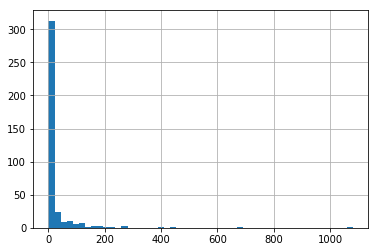

In [10]:
df.likes_memes.hist(bins=50);

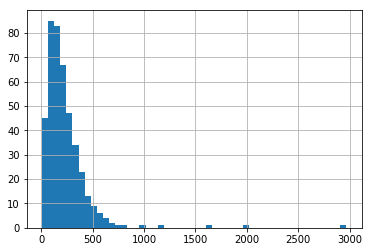

In [11]:
df.friends_cnt.hist(bins=50);

Видели? У лайков очень длинный хвост. Какой-то деятель оставил в паблосе аж $\approx 1000$ лайков. Чем длиннее хвост, тем страшнее выбросы. У числа друзей хвост короче. Из-за этого среднее и медианное число друзей ближе друг к другу.

__Запомните на всю жизнь:__ выбросы - зло. Среднее значение чувствительно к выбросам, а медиана нет. 

**Мода**

Это последняя мера центральной тенденции, о которой пойдёт речь. Мода определяется как значение, которое наиболее часто встречается в наборе данных. Давайте посмотрим на самое модное число лайков.

In [12]:
df.likes_memes.mode()

0    0.0
dtype: float64

Обратите внимание, что, если значение появляется в данных неоднократно, оно приблизит среднее значение к моде. Чем чаще появляется значение, тем сильнее оно влияет на среднее. Таким образом, мода показывает наиболее значимый фактор, формирующий среднее значение.

Приятная особенность моды состоит в том, что её мы можем посмотреть не только для численных данных, но и для категориальных. Например, мы можем узнать какое имя на потоке самое частое. 

In [13]:
df.first_name.mode()

0    Дарья
dtype: object

С помощью ещё одного няшного метода `value_counts()` мы можем посмотреть на то, как часто оно встречалось. 

In [14]:
df.first_name.value_counts()[:10]

Дарья        12
Анна         11
Александр     9
Анастасия     9
Никита        8
Полина        7
Мария         7
Глеб          7
Иван          7
Андрей        6
Name: first_name, dtype: int64

## 1.3 Меры разброса

Выше мы посмотрели на то насколько данные типичные. Кроме типичность интересно насколько жесткий в данных разброс. Наример, в случае лайков, хвост длиннее, чем в случае друзей. Разные меры разброса помогают понять это. Они отвечают на вопрос: «Как сильно варьируются мои данные?». Например, мы поняли, что типичное число друзей находится в районе $200$. Возникает вопрос, а на сколько больше или меньше может быть число друзей.

**Дисперсия и стандартное отклонение**

Давайте посмотрим на то, насколько число друзей отличается от среднего значения. Для этого будем брать число друзей $x_i$ и вычитать из него среднее, $\bar x$:

$$
(x_i - \bar x)
$$

Предположим, что среднее значение $30$. У парня по имени Ярополк $25$ друзей. У девушки по имени Рагнеда $35$. Получается, что Ярополк отличается от типичного первокурсника на $25 - 30 = -5$ друзей. А Рагнеда на $35 - 30 = 5$ друзей. Когда мы сложим эти различия, получится $0$. Разброса нет. А это неправда. Из-за этого обычно разность возводят в квадрат. Тогда получается, что разброс в выборке составляет 

$$
\frac{1}{2} \cdot((25-30)^2 + (35-30)^2) = 25
$$ 

квадратных друзей. 

Ещё квадрат нужен для того, чтобы подчеркнуть, что чем сильнее число друзей отличается от среднего, тем выше разброс. Посчитанная нами выше величина называется *дисперсией*

$$
\sigma^2= \frac{1}{n} \sum_{i=1}^{n} (x_{i}-{\bar {x}})^{2}
$$

Проблема дисперсии в том, что она измеряется в квадратных друзьях. Чтобы вернуться назад, к обычным друзьям, нужно извлечь из неё корень. Тогда получится величина, которая называется *среднеквадратическим отклонением* или *стандартным отклонением*. 

In [15]:
df.friends_cnt.var() # дисперсия, variance

52391.339045504996

In [16]:
df.friends_cnt.std() # стандартное отклонение, standard deviation

228.89154428572715

Часто дисперсию считают по формуле 

$$
\sigma^2= \frac{1}{n-1} \sum_{i=1}^{n} (x_{i}-{\bar {x}})^{2}
$$

Это правильнее. Почему — вы узнаете на математической статистике. Пока что это за гранью нашего понимания. Просто свыкнитесь с этой мыслью до тех пор, пока не изучите теорию вероятностей. Когда изучите, можно начинать рефлексировать и уходить в астрал несмещённостей и эффективностей. 

Давайте вручную убедимся, что питон считает именно по такой формуле. Для этого вытащим в переменную `friends` число друзей. Иногда в табличке встречаются пропуски, которые обозначаются символом `NA` (not availible). Нужно избавиться от пропусков. Это помогает сделать метод `.dropna()`. Он выбросит все пропуски.

In [17]:
friends = df.friends_cnt.dropna() # выбросили все пропуски
n = friends.shape[0]              # узнали сколько всего осталось строк

# посчитали дисперсию по классной формуле, результат совпадает с методом .var()
sum((friends - friends.mean())**2) / (n - 1)

52391.33904550498

In [18]:
# посчитали дисперсию по недостаточно классной формуле, есть небольшое отличие от предыдущего значения
sum((friends - friends.mean())**2) / n

52268.065306574375

## 1.4 Метод describe

**Метод describe** считает всё и сразу! 

In [19]:
df.describe()

,likes_memes,uid,male_dummy,facebook_dummy,instagram_dummy,skype_dummy,twitter_dummy,home_phone_dummy,mobile_phone_dummy,site_dummy,...,photo_month_mean,photo_repost_cnt,photo_repost_max,photo_repost_mean,photo_repost_median,photo_text_len_cnt,photo_ava_change_cnt,photo_text_url_len_cnt,friends_from_course_cnt,friends_mail_from_course_pct
count,384.000000,4.250000e+02,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,...,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.0,376.000000,384.000000,384.000000
mean,24.447917,2.112358e+08,0.458824,0.002353,0.195294,0.051765,0.014118,0.028235,0.047059,0.110588,...,4.270131,0.353723,0.188830,0.014372,0.002660,0.227394,0.0,0.119681,31.979167,0.450759
std,80.102333,1.130256e+08,0.498889,0.048507,0.396894,0.221813,0.118115,0.165840,0.212014,0.313991,...,12.912769,1.703295,0.605735,0.064351,0.051571,3.044912,0.0,0.747644,18.632199,0.160002
min,0.000000,2.232686e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.000000,0.000000
25%,0.000000,1.405058e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,20.000000,0.333333
50%,3.000000,1.857325e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.625000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,28.000000,0.459993
75%,15.250000,2.579428e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,39.000000,0.560976
max,1081.000000,5.701148e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,151.833333,27.000000,8.000000,0.666667,1.000000,43.500000,0.0,9.000000,125.000000,1.000000


Для каждой переменной мы видим: 

* `count` - число наблюдений, которое есть без пропусков
* `mean` - среднее значение
* `std` - стандартное отклонение
* `min` -  минимум
* `max` -  максимум
* `50%` -  медиана (половина выборки больше неё, половина меньше)
* `25%` -  25% квантиль (четверть выборки меньше, 75% больше)
* `75%` -  75% квантиль

Можно построить такую же табличку только для категориальных переменных. 

In [20]:
df.describe(include='object')

,city,country,first_name,home_town,last_name,schools_cnt,relation_cat,life_main_cat,people_main_cat,political_cat,wall_emoji_trace,wall_text
count,328,364,425,112,425,46,193,162,163,12,205,311
unique,55,14,213,54,412,12,7,7,6,6,202,274
top,Москва,Россия,Дарья,Москва,Максимова,а,не указано,0.0,0.0,умеренные,❤️,
freq,253,344,12,46,2,22,160,128,127,5,2,18


* `count` -  число наблюдений, которое есть без пропусков
* `unique` - число уникальных значений (категорий), которые принимает переменная
* `top` - мода для каждой категории
* `freq` - частота, с которой встречается мода

Кстати говоря, любой квантиль можно посчитать следующей функцией. Обратите внимание, что в качестве аргумента здесь пишется не значение процента $0-100$, а доля из диапазона $0-1$.

In [21]:
df.friends_cnt.quantile(0.95)

511.19999999999936

Выходит, что у $95\%$ людей из выборки меньше $511$ друзей, и у $5\%$ --- больше. Т.е. чтобы вывести топ-$5\%$ по дружелюбности, достаточно построить условие `количество друзей > квантиль-95`.

In [22]:
df[df.friends_cnt > df.friends_cnt.quantile(0.95)]

,city,country,first_name,home_town,in_hse_memes_group,is_bmm,is_closed,last_name,likes_memes,uid,...,photo_month_mean,photo_repost_cnt,photo_repost_max,photo_repost_mean,photo_repost_median,photo_text_len_cnt,photo_ava_change_cnt,photo_text_url_len_cnt,friends_from_course_cnt,friends_mail_from_course_pct
2,Москва,Россия,Александр,Омск,False,True,False,Головачев,0.0,138413935,...,1.400000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,32.0,0.406250
24,Москва,Россия,Владимир,Тирасполь,True,True,False,Загниборода,0.0,241412773,...,2.750000,2.0,1.0,0.060606,0.0,0.0,0.0,0.0,27.0,0.296296
25,NaN,NaN,Егор,Москва,False,True,False,Теплухин,19.0,101712503,...,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,47.0,0.234043
43,Москва,Россия,Дари,NaN,True,True,False,Олзоева,2.0,145835178,...,3.900000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,71.0,0.366197
65,Санкт-Петербург,Россия,Юрий,NaN,False,True,False,Каплин,0.0,238418880,...,8.166667,1.0,1.0,0.010204,0.0,0.0,0.0,3.0,32.0,0.343750
81,Москва,Россия,Яна,NaN,True,True,False,Варданян,0.0,317626410,...,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,42.0,0.380952
112,Москва,Россия,Dima,Тирасполь,False,True,False,Telyatnikov,3.0,156961333,...,2.500000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,70.0,0.371429
114,Иркутск,Россия,Екатерина,NaN,True,True,False,Лобова,41.0,241205744,...,5.666667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,27.0,0.333333
174,Москва,Россия,Андрей,NaN,True,False,False,Гладышев,269.0,135934873,...,3.300000,1.0,1.0,0.030303,0.0,0.0,0.0,0.0,56.0,0.464286
176,Москва,Россия,Анжелика,Москва,True,False,False,Искандерова,1.0,138086790,...,6.000000,2.0,1.0,0.027778,0.0,0.0,0.0,0.0,92.0,0.500000


Да-да, примерно так вас можно "отсеять" по рейтингу при _распределении различных студенческих благ_ (c) 

__Подробнее тут:__  https://www.hse.ru/studyspravka/rate/.

# 2. Группировка

Если бы нас попросили посчитать, какое среднее число лайков ставят под мемы парни и девушки, мы могли бы сделать это с помощью срезов: 

In [23]:
df[df.male_dummy == 0].likes_memes.mean()

29.176190476190477

In [24]:
df[df.male_dummy == 1].likes_memes.mean()

18.74137931034483

Судя по всему, парни чаще проявляют свою любовь к мемам, так как в среднем они оставляют в паблике больше лайков. Не факт, что это правда. Вполне может быть, что у нас не очень удачная выборка. Статистика требует, чтобы подобные вещи проверялись более аккуратно. Ближе к концу курса мы займёмся такой аккуратной проверкой. 

Код пришлось продублировать дважды. А что, если бы полов было не два, а десять? Пришлось бы копировать и вставлять код десяток раз. Это не очень эффективно. Чтобы так не делать, придумали группировки. Их обычно делают с помощью метода `groupby`.

In [25]:
df.groupby('male_dummy').likes_memes.mean()

male_dummy
0    29.176190
1    18.741379
Name: likes_memes, dtype: float64

В качестве аргумента в этой переменной нужно указать по каким переменным мы хотели бы осуществить группировку применяемой функции. В данной ситуации это пол. 

Можно делать `groupby` по нескольким колонкам, получать результаты по нескольким колонкам и даже применять несколько функций за раз! Например, можно сравнить количество лайков и фото под записями на стене у парней / девушек без / с инстаграмом.

In [26]:
df.groupby(['male_dummy', 'instagram_dummy'])[['wall_like_cnt', 'photos_cnt']].agg(['count','min','max','mean'])

wall_like_cnt                              \
                                   count   min      max         mean   
male_dummy instagram_dummy                                             
0          0                         138   2.0  19715.0  1066.992754   
           1                          50  12.0   8209.0   969.800000   
1          0                         131   0.0   8301.0   787.450382   
           1                          24   1.0   7443.0   858.458333   

                           photos_cnt                          
                                count  min     max       mean  
male_dummy instagram_dummy                                     
0          0                      155  0.0  1822.0  46.883871  
           1                       56  1.0   331.0  37.464286  
1          0                      146  0.0  1577.0  40.589041  
           1                       27  0.0   107.0  16.333333

А если вместо конкретных статистик хочется вывести просто всё сразу для всех, можно снова обратиться к `describe`:

In [27]:
df.groupby(['male_dummy', 'instagram_dummy']).describe()

likes_memes                                         \
                                 count       mean         std  min  25%   50%   
male_dummy instagram_dummy                                                      
0          0                     155.0  19.987097   41.756404  0.0  0.0   3.0   
           1                      55.0  55.072727  172.104066  0.0  1.5  11.0   
1          0                     147.0  16.639456   54.309103  0.0  0.0   2.0   
           1                      27.0  30.185185   60.239290  0.0  0.0   5.0   

                                            uid                ...  \
                             75%     max  count          mean  ...   
male_dummy instagram_dummy                                     ...   
0          0                17.0   232.0  174.0  2.157588e+08  ...   
           1                26.0  1081.0   56.0  1.773874e+08  ...   
1          0                11.0   440.0  168.0  2.223980e+08  ...   
           1                19.5   269.0   27.0  1.828377e+08  ...   

                           friends_from_course_cnt         \
                                               75%    max   
male_dummy instagram_dummy                                  
0          0                                 36.00  125.0   
           1                                 42.00  106.0   
1          0                                 38.75  104.0   
           1                                 52.00  107.0   

                           friends_mail_from_course_pct                      \
                                                  count      mean       std   
male_dummy instagram_dummy                                                    
0          0                                      155.0  0.378743  0.140965   
           1                                       56.0  0.426892  0.132435   
1          0                                      146.0  0.526642  0.153602   
           1                                       27.0  0.503348  0.152924   

                                                                              
                                 min       25%       50%       75%       max  
male_dummy instagram_dummy                                                    
0          0                0.000000  0.270979  0.380952  0.500000  0.727273  
           1                0.125000  0.321815  0.447222  0.530392  0.647059  
1          0                0.148148  0.422484  0.537749  0.635809  1.000000  
           1                0.250000  0.414890  0.475410  0.578576  0.941176  

[4 rows x 648 columns]

# 3.  Apply

Можно делать с ячейками разные страшные вещи. Например, можно применить к каждому объекту ячейки одну и ту же функцию. Это можно сделать это методом `apply`. Например, вот так можно посчитать число букв в имени каждого человека из таблицы: 

In [28]:
df.first_name.apply(len)[:10]

0    10
1     9
2     9
3     4
4     7
5    10
6     5
7     5
8     9
9     7
Name: first_name, dtype: int64

Можно даже построить распределение длин имён. 

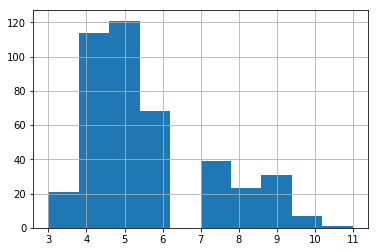

In [29]:
df.first_name.apply(len).hist();

А ещё посчитать среднюю длину имени и многое другое. 

In [30]:
df.first_name.apply(len).mean()

5.527058823529412

Можно написать свою функцию и применить её к колонке. Например, вот так можно достать первую букву каждого имени: 

In [31]:
def my_function(name):
    return name[0]

example = "Настя"

my_function(example)

'Н'

In [32]:
df.first_name.apply(my_function)[:10]

0    А
1    А
2    А
3    А
4    А
5    А
6    А
7    А
8    A
9    Н
Name: first_name, dtype: object

Ровно то же самое можно сделать в одну строчку с помощью лямбда-функций. Это как обычная функци, но её нигде не надо объявлять. 

In [33]:
df.first_name.apply(lambda name: name[0])[:10]

0    А
1    А
2    А
3    А
4    А
5    А
6    А
7    А
8    A
9    Н
Name: first_name, dtype: object

Преобразования можно делать сколь угодно сложными.


#### Задание 1

В переменной `wall_text` лежат тексты со стен всех пользователей.

* Постройте распределение длин для всех стен. 
* Сколько людей написали на своей стенке хотябы раз название своего вуза? 


In [34]:
df.wall_text.head()

0         Давай поговорим о личном   Буду вашим кот...
1        Лучший фотограф😻😻        ой,  может даже у...
2    🚀 [id18115779|Баха], спасибо за атмосферу 🌌 \n...
3    Не проходите мимо! Приходите к нам! Ждём всех!...
4    Нам пора признать, что зимний сезон следует сд...
Name: wall_text, dtype: object

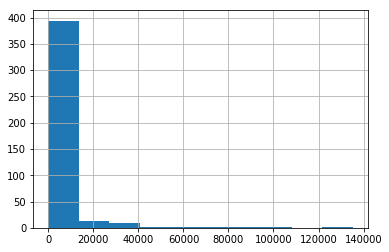

In [35]:
# на некоторых стенах есть пропуски, их надо заполнить :) 
df.wall_text.fillna('').apply(len).hist();

In [36]:
def hse_count(wall):
    wall = wall.lower()
    return ("вышка" in wall) | ("вшэ" in wall) | ("вышку" in wall)

In [37]:
df.wall_text.fillna('').apply(hse_count).sum()

9

Другой способ: 

In [38]:
df.wall_text.fillna('').apply(lambda w: ("вышка" in w.lower()) | ("вшэ" in w.lower()) | ("вышку" in w.lower())).sum()

9

Понятное дело, что мы посчитали не очень точно, так как слово вышка можно просклонять очень по-разному. 

# 4. Поиск ответов на глупые вопросы 

Давайте снова поищем ответы на наши вопросы по данным. На этот раз вопросы будут посложнее. 

#### Задание 2

Вывести имена самых больших любителей мемов (топ 1\% значений по колонке `likes_memes`. Итоговую табличку отсортировать по числу оставленных в группе лайков. 

In [39]:
q = df['likes_memes'].quantile(0.99)

df.loc[df['likes_memes'] >= q,
       ['first_name', 'likes_memes']].sort_values('likes_memes', ascending=False)

,first_name,likes_memes
134,Полина,1081.0
363,Николь,685.0
205,Александр,440.0
189,Данил,398.0


#### Задание 3

Построить гистограммы для параметров `wall_emoji_cnt` (число эмодзи на стене у человека) и `wall_comment_cnt` (число коментов на стене у человека). Где больше выбросов?

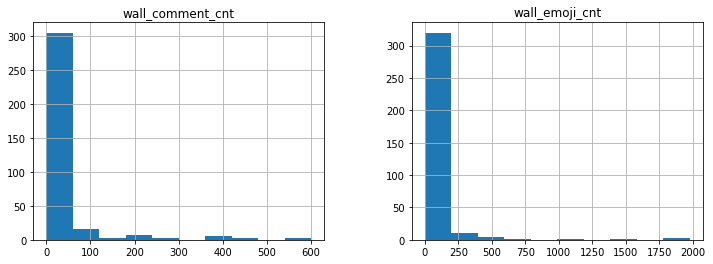

In [40]:
df[['wall_emoji_cnt','wall_comment_cnt']].hist(figsize=(12,4));

Сравните для обоих показателей средние с медианами. Какие выводы о хвостах распределений и выборосах можно сделать из этого сравнения? 

In [41]:
df[['wall_emoji_cnt','wall_comment_cnt']].mean() - df[['wall_emoji_cnt','wall_comment_cnt']].median()

wall_emoji_cnt      60.909621
wall_comment_cnt    29.632653
dtype: float64

#### Задание 4

Посчитайте соотношение полов в направлениях по маркетингу и менеджменту (`is_bmm` - если с маркетинга $1$, с менеджмента $0$). Проинтерпретируйте итоговые показатели. Где больше парней? Во сколько раз? 

In [42]:
df_agg = df.groupby('is_bmm')['male_dummy'].agg(['count','sum'])
df_agg

,count,sum
is_bmm,,
False,263,145
True,162,50


In [43]:
df_agg["sum"]/df_agg["count"]

is_bmm
False    0.551331
True     0.308642
dtype: float64

Парней больше на УБ. Там их доль $55\%$. На БММ доля парней $30\%$. Выходит, что на УБ парней больше почти в $2$ раза, чем на БММ. 

In [44]:
# другой способ: 
df_agg = df.groupby('is_bmm')['male_dummy']
df_agg.sum()/df_agg.count()

is_bmm
False    0.551331
True     0.308642
Name: male_dummy, dtype: float64

#### Задание 5

Каждый студент добавляет к себе в друзья людей со своего потока. В переменной `friends_mail_from_course_pct` записана доля парней-друзей с потока (то, что переменная называется не `male` - опечатка).

Постройте гистограмму для распределения доли парней в друзьях для девушек и для парней. Обе гистограммы постройте на одной картинке. 

In [45]:
# пакет для картинок, о нём подробнее в следующий раз
import matplotlib.pyplot as plt

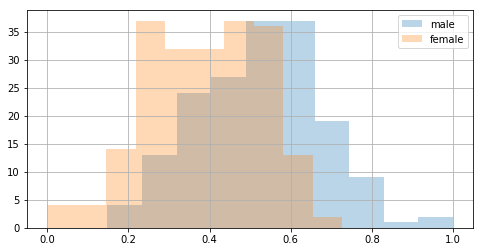

In [46]:
df[df.male_dummy == 1].friends_mail_from_course_pct.hist(figsize=(8,4), alpha=0.3, label="male")
df[df.male_dummy == 0].friends_mail_from_course_pct.hist(figsize=(8,4), alpha=0.3, label="female")
plt.legend();

Посчитайте для обеих групп среднее и дисперсию. Какие выводы вы можете сделать на основе посчитанных статистик? 

In [47]:
df.groupby('male_dummy')['friends_mail_from_course_pct'].agg(['mean', 'std'])

,mean,std
male_dummy,,
0,0.391522,0.140071
1,0.523007,0.153287


__Выводы:__

- Средняя доля друзей парней у парней гораздо выше, чем средняя доля друзей парней у девушек
- Разброс в доле друзей парней у парней выше, чем у девушек, этот показатель более непредсказуем. 

Только не надо делать из этой статистики вывод, что дружба между мужчиной и женщиной невозможна. Эту гипотезу можно попытаться проверить на данных с помощью немного иного статистического арсенала, про который мы будем говорить в будующем. 

![](https://images.aif.ru/018/038/7ad2753867ed0c5d0281f453bb55bf8a.jpg)